# Lagrangian Mechanics!!!

Lagrangian Mechanics makes me excited. Look at this formula:

$\frac{\partial{L}}{\partial{\theta}}-\frac{d}{dt}\frac{\partial{L}}{\partial{\dot{\theta}}} = 0$

It's so pretty! It's so meaningful. It's so succinct! And of course, if you noticed the theta, you might well be guessing what I'm thinking about doing here. Let's do a simple example of the Lagrangian in action by analyzing a pendulum.

The kinetic energy of a pendulum with mass $m$ and length $l$ is given by $T = \frac{m(l\dot{\theta})^2}{2}$ and if we set $\theta = 0$ at the point where it's a plumb line pointing straight down, then the potential energy of the system is given by $V = mg(l-l\cos\theta)$.

Our Lagrangian is $L=T-V$ and substituting that into our first formula we get $-mgl\sin\theta-ml^2\ddot{\theta}=0$ and some quick simplification and we've got $\ddot{\theta}=-\frac{g\sin\theta}{l}$.

This is easily converted into a system of first order differential equations:

$\frac{d}{dt}\theta=\dot{\theta}$

$\frac{d}{dt}\dot{\theta}=-\frac{g\sin\theta}{l}$

In [1]:
## Let's import the stuff we might need
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 1 ##kg
l = 3 ##m
theta0 = 0 # ICs
theta_dot0 = 2 # rad/s

In [3]:
## These will store values over time
thetas=[]
dthetas=[]

In [4]:
thetas.append(theta0)
dthetas.append(theta_dot0)
dt=0.01 ## time step for simple forward euler
T_f = 10
for i in range(0,int(T_f/dt)):
    temp0=dthetas[i]*dt
    temp1=-9.8/l*np.sin(thetas[i])*dt
    thetas.append(thetas[i]+temp0)
    dthetas.append(dthetas[i]+temp1)

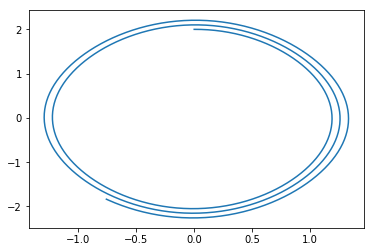

In [5]:
plt.plot(thetas,dthetas)
plt.show()

We can already see something strange happening here. Why's the radius of the spiral growing? Well unfortunately that's an artifact of the Euler method... it isn't that great, and given a large enough T_f it'll spiral out and keep going. Let's try another plot though.

In [6]:
theta_dot0 = 10 ## Now it's REALLY moving
thetas=[] ## re-initialize the system
dthetas=[]
thetas.append(theta0)
dthetas.append(theta_dot0)
dt=0.01 ## time step for simple forward euler
T_f = 10
for i in range(0,int(T_f/dt)):
    temp0=dthetas[i]*dt
    temp1=-9.8/l*np.sin(thetas[i])*dt
    thetas.append(thetas[i]+temp0)
    dthetas.append(dthetas[i]+temp1)

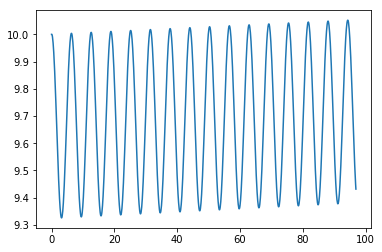

In [7]:
plt.plot(thetas,dthetas)
plt.show()

What's this plot mean physically? 

The pendulum starts rotating at an incredible 10 rad/s and reaches the top of it's swing only slowing to ~9.3 rad/s and swings through the motion entirely. Theta keeps on ticking up and up as it completes each revolution tacking on another $2\pi$ for each complete loop.

I'm excited to start doing some computational physics, and this is really just the tip of the iceberg here. There's so many integration schemes to try out, and graphics libraries to learn. My LaTeX skills need a major bolster, and *heck* I need to learn some more computational physics anyway! I'm very excited!

So, how might we get a better simulation? One method is the Euler-Cromer method or semi-implicit Euler. The only thing we have to change is now our $\dot{\theta}$ will be "time-stepped" forward and that value will be used to calculate the next $\theta$.

In [8]:
theta_dot0 = 2 ## We'll go back to the first examples ICs
thetas=[] ## re-initialize the system
dthetas=[]
thetas.append(theta0)
dthetas.append(theta_dot0)
dt=0.01 ## time step for simple forward euler
T_f = 10
for i in range(0,int(T_f/dt)):
    temp1=-9.8/l*np.sin(thetas[i])*dt ## Note the orders been switched
    temp0=(dthetas[i]+temp1)*dt ## Note the change to dtheta+temp1
    thetas.append(thetas[i]+temp0)
    dthetas.append(dthetas[i]+temp1)

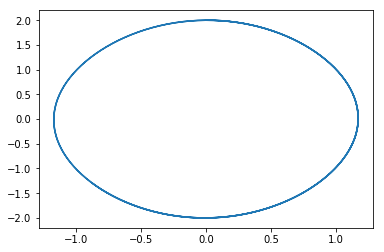

In [9]:
plt.plot(thetas,dthetas)
plt.show()

Holy guacamole! That simple tweak completely fixed it! The spiraling artifact of the explicit Euler method is out of sight! It turns out this semi-implicit Euler is particularly well suited for harmonic systems.

